In [395]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.typing import NDArray
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm


In [396]:
p_inicial = 0.1 # probability of a cell being alive
p_step = 20 # number of steps in the probability
n = 100 # size of the grid
m = 100 # number of generations

In [397]:
def plot_heatmap(matrix: np.ndarray) -> None:
    cmap = ListedColormap(['white', 'green', 'red', 'black'])
    norm = BoundaryNorm([0, 1, 2, 3, 4], cmap.N)

    plt.imshow(matrix, cmap=cmap, norm=norm, interpolation='nearest')
    plt.colorbar()
    plt.title("Mapa de Calor")
    plt.xlabel("Colunas")
    plt.ylabel("Linhas")
    plt.show()

In [398]:
def generate_probabilitie_matrix(n: int) -> NDArray[np.float64]:
    P = np.random.rand(n, n)
    return P

In [399]:
def generate_burning_tree(matrix, p):
    while True:
        x = np.random.randint(matrix.shape[0])
        y = np.random.randint(matrix.shape[1])
        if matrix[x, y] < p:
            return x, y

In [400]:
def initialize_forest(matrix, p):
    n = matrix.shape[0]
    """Initialize the forest with trees distributed with probability p"""
    forest = np.zeros((n, n), dtype=np.int8)
    for i in range(n):
        for j in range(n):
            if matrix[i][j] < p:
                forest[i, j] = 1
    return forest

In [401]:
def update_forest(forest, burning_trees):
    """Update the forest by spreading the fire"""
    new_forest = forest.copy()
    new_burning_trees = set()
    max_l = forest.shape[0]

    for x, y in burning_trees:
        for i in range(-1, 2):
            for j in range(-1, 2):
                if i == 0 and j == 0:
                    new_forest[x, y] = 3
                elif 0 <= x + i < max_l and 0 <= y + j < max_l:
                    if forest[x + i, y + j] == 1:
                        new_forest[x + i, y + j] = 2
                        new_burning_trees.add((x + i, y + j))
    return new_forest, new_burning_trees

In [402]:
def simulate_forest_fire(forest, burning_trees):
    """Simulate the forest fire"""
    count = 0
    while burning_trees:
        forest, burning_trees = update_forest(forest, burning_trees)
        count += 1
    total_burned = np.sum(forest == 3)
    total_not_burned = np.sum(forest == 1)
    return total_burned, total_not_burned, count

In [403]:
def simulate_any_forests(probabilities_matrixes, burning_trees, p):
    burned = []
    not_burned = []
    counts = []
    for matrix in probabilities_matrixes:
        forest = initialize_forest(matrix, p)
        total_burned, total_not_burned, count = simulate_forest_fire(forest, burning_trees)
        burned.append(total_burned)
        not_burned.append(total_not_burned)
        counts.append(count)
    return burned, not_burned, counts

In [404]:
p_values = np.linspace(p_inicial, 1.0, p_step)
probabilities_matrixes = [generate_probabilitie_matrix(n) for _ in range(m)]
burning_trees = [generate_burning_tree(matrix, p_inicial) for matrix in probabilities_matrixes]

burned_mean = []
not_burned_mean = []
counts_mean = []

for p in p_values:
    burned, not_burned, counts = simulate_any_forests(probabilities_matrixes, burning_trees, p)
    burned_mean.append(np.mean(burned))
    not_burned_mean.append(np.mean(not_burned))
    counts_mean.append(np.mean(counts))

burned_mean_array = np.array(burned_mean)
burned_percentage = burned_mean_array / (m ** 2)

Text(0.5, 1.0, 'Average Burned Area vs Initial Tree Density')

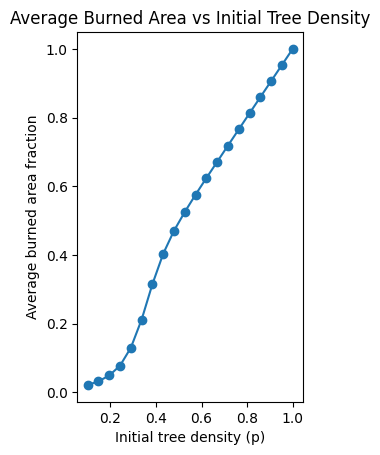

In [405]:
plt.subplot(1, 2, 1)
plt.plot(p_values, burned_percentage, 'o-')
plt.xlabel('Initial tree density (p)')
plt.ylabel('Average burned area fraction')
plt.title('Average Burned Area vs Initial Tree Density')



Text(0.5, 1.0, 'Average Iterations vs Initial Tree Density')

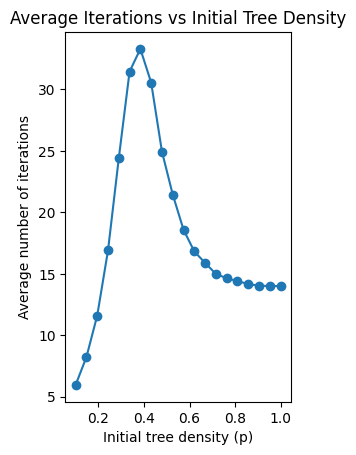

In [406]:
plt.subplot(1, 2, 2)
plt.plot(p_values, counts_mean, 'o-')
plt.xlabel('Initial tree density (p)')
plt.ylabel('Average number of iterations')
plt.title('Average Iterations vs Initial Tree Density')